In [3]:
import pandas as pd
import glob
import os
from pathlib import Path
import numpy as np
import scipy
import shutil
import matplotlib.pyplot as plt

# Load Dataframes

In [5]:
all_dfs = {}

## Natural Proteins

In [6]:
sampdir = Path("/data/lux70/plaid/artifacts/natural")
nat_df_dict = {}
for length in os.listdir(sampdir):
    nat_df_dict[length] = pd.read_csv(sampdir / str(length) / "designability.csv")

nat_df = pd.concat(list(nat_df_dict.values()))
nat_df = nat_df.reset_index(drop=True)
nat_df = nat_df.drop(['Unnamed: 0'],axis=1)

nat_df['method'] = ['Natural'] * len(nat_df)
nat_df.rename({"ccTM":"cctm"}, axis=1) #inconsistency

print(nat_df.designable.sum() / len(nat_df))
nat_df.head()

all_dfs['Natural'] = nat_df

0.999526066350711


In [7]:
nat_df.columns

Index(['pdb_paths', 'sequences', 'inverse_generated_pdb_paths', 'inv_gen_seqs',
       'phantom_generated_pdb_paths', 'phantom_gen_seqs', 'plddt', 'ccrmsd',
       'cctm', 'designable', 'scrmsd', 'sctm', 'perplexity', 'scperplexity',
       'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'gravy', 'charge_at_pH', 'ccsr', 'scsr',
       'alpha_fraction', 'beta_fraction', 'dssp_annotation', 'method'],
      dtype='object')

In [8]:
nat_df.describe()

,plddt,ccrmsd,cctm,scrmsd,sctm,perplexity,scperplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH,ccsr,scsr,alpha_fraction,beta_fraction
count,4220.000000,4.220000e+03,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,78.889005,1.349789e-02,0.999664,4.432093,0.783604,9.865328,11.812500,14172.426968,0.084651,38.079327,6.959271,-0.184684,-1.136821,0.354533,0.355121,0.233514,0.161922
std,11.001894,1.473318e-01,0.005765,6.171212,0.204115,5.027202,3.246396,10958.734299,0.037552,16.755585,1.976096,0.460696,5.730593,0.104548,0.103740,0.116934,0.162444
min,22.856881,6.584438e-16,0.721970,0.251305,0.134410,1.240745,2.233776,1422.496100,0.000000,-18.421212,4.050028,-2.109524,-34.655971,0.000000,0.000000,0.015504,0.000000
25%,74.349964,3.760774e-15,1.000000,0.910211,0.676657,5.529786,9.592931,5769.348450,0.057692,27.607228,5.179121,-0.452056,-3.963249,0.289474,0.293308,0.153215,0.000000
50%,81.624059,5.954133e-15,1.000000,1.826484,0.861050,9.303823,11.970889,11231.416350,0.082278,36.346528,6.474382,-0.204668,-0.588467,0.366667,0.365040,0.212633,0.139535
75%,86.262404,4.673924e-14,1.000000,5.366524,0.947477,13.725045,14.043744,18617.782925,0.106802,46.402206,8.860567,0.044637,2.062042,0.433333,0.432641,0.284780,0.276085
max,96.962145,6.595819e+00,1.000000,116.396061,0.995960,35.084185,25.068486,57047.234000,0.269231,184.480000,11.999968,1.571429,27.420586,0.607143,0.607143,1.000000,0.702341


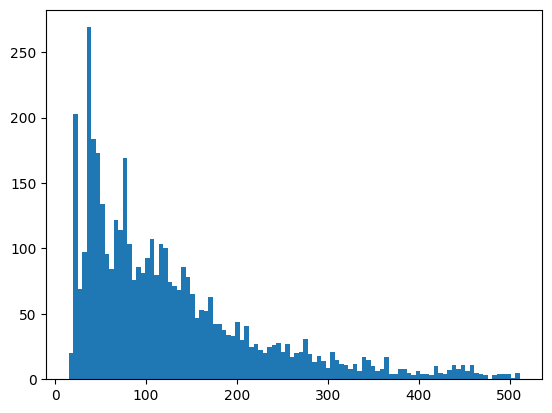

In [36]:
_ = plt.hist(nat_df.sequences.str.len().values,bins=100)

## Multiflow

In [7]:
sampdir = Path("/data/lux70/plaid/baselines/multiflow/100_200_300_organized/")
df = pd.read_csv(sampdir / "designability.csv")

In [8]:
df.describe()

,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,100.0,1.658384,1.662690,0.931138,0.940470,8.482813,21453.771541,0.026450,37.331806,5.664657,-0.319556,-6.155028
std,86.746758,0.0,2.110375,2.865664,0.077312,0.084088,1.819041,8245.127013,0.017859,14.586060,1.352655,0.651269,7.112804
min,0.000000,100.0,0.516474,0.433780,0.395070,0.427110,4.534962,9044.054600,0.000000,-3.956000,4.143472,-1.604000,-27.275337
25%,74.750000,100.0,0.904577,0.787151,0.927233,0.944408,7.069063,11837.771100,0.010000,26.903750,4.893164,-0.758875,-10.411613
50%,149.500000,100.0,1.126634,0.978429,0.956820,0.965415,8.575827,22349.500200,0.025000,36.578500,5.169501,-0.481000,-6.444398
75%,224.250000,100.0,1.502373,1.280247,0.970980,0.975645,9.916768,29260.894850,0.040000,46.565333,5.777834,0.079333,-2.112008
max,299.000000,100.0,16.103647,24.882649,0.983970,0.993310,13.441529,34939.850700,0.090000,84.987000,9.516646,1.403000,22.924717


## ProteinGenerator

In [10]:
# sampdir = Path("/data/lux70/plaid/baselines/proteingenerator/100_200_300/")
sampdir = Path("/data/lux70/plaid/baselines/proteingenerator/by_length/")
df = pd.read_csv(sampdir / "designability.csv")

df = df.reset_index(drop=True)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.rename({"ccTM":"cctm"}, axis=1) #inconsistency
df['method'] = ['ProteinGenerator'] * len(df)
all_dfs['ProteinGenerator'] = df


print(df.designable.sum() / len(df))
print(df.columns)
df.describe()

0.0818976941425921
Index(['pdb_paths', 'sequences', 'inverse_generated_pdb_paths', 'inv_gen_seqs',
       'phantom_generated_pdb_paths', 'phantom_gen_seqs', 'plddt', 'ccrmsd',
       'cctm', 'designable', 'scrmsd', 'sctm', 'perplexity', 'scperplexity',
       'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'gravy', 'charge_at_pH', 'ccsr', 'scsr',
       'alpha_fraction', 'beta_fraction', 'dssp_annotation', 'method'],
      dtype='object')


,plddt,ccrmsd,cctm,scrmsd,sctm,perplexity,scperplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH,ccsr,scsr,alpha_fraction,beta_fraction
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000
mean,0.691922,11.861151,0.582881,10.699670,0.722083,8.602878,8.734880,28496.882418,0.029150,50.592121,6.646412,0.341522,-6.882285,0.284296,0.398128,0.120734,0.044556
std,0.239041,8.608627,0.196549,14.110450,0.268914,2.052607,2.645703,10919.234236,0.028557,21.706998,2.810517,0.767033,11.230056,0.089886,0.091324,0.090207,0.096930
min,0.110848,0.475786,0.145930,0.445953,0.055160,2.191631,2.095846,6236.753600,0.000000,-2.875357,4.050028,-1.734375,-48.147429,0.019397,0.027778,0.015873,0.000000
25%,0.561159,4.136100,0.434850,1.430098,0.566990,7.042037,7.629696,19482.108200,0.006410,32.738542,4.688273,-0.262868,-14.133745,0.217105,0.334211,0.076389,0.000000
50%,0.757008,9.908951,0.575820,3.286519,0.845310,8.405668,9.396806,29736.054700,0.019068,46.469375,5.025840,0.319118,-6.074275,0.295082,0.404545,0.094697,0.000000
75%,0.880180,18.073533,0.748050,14.429162,0.937340,10.180160,10.576103,37466.303200,0.046875,66.047727,9.359859,1.046782,1.170869,0.351695,0.462500,0.135246,0.008696
max,0.995601,39.329478,0.979200,74.848169,0.990220,15.336437,14.349285,56102.196200,0.169118,142.023864,11.999968,1.795354,28.047285,0.611111,0.729167,0.998047,0.692623


## Protpardelle

In [12]:
# sampdir = Path("/data/lux70/plaid/baselines/protpardelle/samples_100_200_300/")
sampdir = Path("/data/lux70/plaid/baselines/protpardelle/samples_by_length/")

df_dict = {}
for length in os.listdir(sampdir):
    df_dict[length] = pd.read_csv(sampdir / str(length) / "designability.csv")
df = pd.concat(list(df_dict.values()))

df = df.reset_index(drop=True)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.rename({"ccTM":"cctm"}, axis=1) #inconsistency
df['method'] = ['Protpardelle'] * len(df)
all_dfs['Protpardelle'] = df
print(df.columns)

print(df.designable.sum() / len(df))

df.head()

Index(['pdb_paths', 'sequences', 'inverse_generated_pdb_paths', 'inv_gen_seqs',
       'phantom_generated_pdb_paths', 'phantom_gen_seqs', 'plddt', 'ccrmsd',
       'cctm', 'designable', 'scrmsd', 'sctm', 'perplexity',
       'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'gravy', 'charge_at_pH', 'ccsr', 'scsr',
       'alpha_fraction', 'beta_fraction', 'dssp_annotation', 'method'],
      dtype='object')
0.0


,pdb_paths,sequences,inverse_generated_pdb_paths,inv_gen_seqs,phantom_generated_pdb_paths,phantom_gen_seqs,plddt,ccrmsd,cctm,designable,...,instability_index,isoelectric_point,gravy,charge_at_pH,ccsr,scsr,alpha_fraction,beta_fraction,dssp_annotation,method
0,/data/lux70/plaid/baselines/protpardelle/sampl...,AGGGAGGAAGAAAALAAAAAAAALAAALAALLAALLAGGAAALAAA...,/data/lux70/plaid/baselines/protpardelle/sampl...,MWGLVFGIVGLLLVLLGGLLVVAVALLAALLGALVGLAGSLAGFLL...,/data/lux70/plaid/baselines/protpardelle/sampl...,MLFLLPLLIVLIILLILLIIYLILLLILLLLLLLLLLLLLLLLLLL...,1.0,37.288790,0.40722,False,...,33.804167,4.654000,0.848465,-27.032548,0.208333,0.236842,0.026316,0.000000,CCSHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHSSCCHHHHHH...,Protpardelle
1,/data/lux70/plaid/baselines/protpardelle/sampl...,LPALALLGLLAGLALLLLLLALLLLGGLPLALLLALLVLVLLAAAR...,/data/lux70/plaid/baselines/protpardelle/sampl...,LLAAGGPLPGLLLGGALGGLGLAGLPLLGLPLLLLLLLLLLALLLP...,/data/lux70/plaid/baselines/protpardelle/sampl...,MRKLLLLLLLLLLLLLLLLLLLLLLLPPLLLLFLLLLLLLLLLLLL...,1.0,43.589847,0.42667,False,...,15.491228,4.265050,2.686842,-5.217445,0.317982,0.375000,0.074561,0.000000,CCCCCCCCCSSTTCTTCSCSSTTTCCCCHHHHHHHHHHHHHHHHHH...,Protpardelle
2,/data/lux70/plaid/baselines/protpardelle/sampl...,AAAGGAGEAAAGAALAAAGLAEKAAAGAAAGAAAAAAALAALAGGA...,/data/lux70/plaid/baselines/protpardelle/sampl...,LLKEELEELKEKEKKLEEEKKEKEEKKKKKKKKKKKKIIKIMLLCV...,/data/lux70/plaid/baselines/protpardelle/sampl...,MKPRRIIILLIILIIILIIILLILLIIIIIVIIIFIIFLILLILLR...,1.0,43.752428,0.36872,False,...,15.265132,4.916766,1.472588,-7.138380,0.171053,0.212719,0.043860,0.000000,CCSTGGGGTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,Protpardelle
3,/data/lux70/plaid/baselines/protpardelle/sampl...,EGGALGGLELLERLGELLRRLRELLRELAELLRLLLGGLAERLLEE...,/data/lux70/plaid/baselines/protpardelle/sampl...,PPPLPGGPLLLPALLGLLLPLVALGLVAGLLGGLLAALLLLLGGAG...,/data/lux70/plaid/baselines/protpardelle/sampl...,MPLVIGIVLGLLILGIVLLILGIIILLLLILILILSGLLLLLLLLL...,1.0,34.100154,0.47062,False,...,34.302193,5.209601,0.302193,-11.989074,0.225877,0.298246,0.067982,0.002193,CCCTTCSCSSSTTHHHHTTTHHHHHHHHHHHHHHHHTTCCCCCCTT...,Protpardelle
4,/data/lux70/plaid/baselines/protpardelle/sampl...,LLLAALLGALGLLGLLPLLLLLLLLLLLLLLLGLLLGLLLLLLLAV...,/data/lux70/plaid/baselines/protpardelle/sampl...,MFKVELDCEVGLDGTPCKIEVEDEDGKKYVIEVSEGGVLTLSTEEE...,/data/lux70/plaid/baselines/protpardelle/sampl...,MPVLLLLLLLLLLVLIPLLLLLLLLILLLLLLKLLPGARPLLLLLL...,1.0,31.467159,0.21909,False,...,43.958772,4.837419,1.421053,-14.107314,0.192982,0.423246,0.423246,0.212719,CCCEECCEECCSSCCCCEEEECCSSSCCEEEEEETTTEEEEEETTT...,Protpardelle


## PLAID

In [13]:
# sampdir = Path("/data/lux70/plaid/artifacts/samples/5j007z42/100_200_300_v2")
sampdir = Path("/data/lux70/plaid/artifacts/samples/5j007z42/by_length/")
df_dict = {}
for length in os.listdir(sampdir):
    df_dict[length] = pd.read_csv(sampdir / str(length) / "designability.csv")
df = pd.concat(list(df_dict.values()))

df = df.reset_index(drop=True)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.rename({"ccTM":"cctm"}, axis=1) #inconsistency
df['method'] = ['PLAID'] * len(df)
all_dfs['PLAID'] = df
print(df.columns)

print(df.designable.sum() / len(df))
df.describe() 

Index(['pdb_paths', 'sequences', 'inverse_generated_pdb_paths', 'inv_gen_seqs',
       'phantom_generated_pdb_paths', 'phantom_gen_seqs', 'plddt', 'ccrmsd',
       'cctm', 'designable', 'scrmsd', 'sctm', 'perplexity',
       'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'gravy', 'charge_at_pH', 'ccsr', 'scsr',
       'alpha_fraction', 'beta_fraction', 'dssp_annotation', 'method'],
      dtype='object')
0.2864583333333333


,plddt,ccrmsd,cctm,scrmsd,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH,ccsr,scsr,alpha_fraction,beta_fraction
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,59.392549,11.279273,0.695255,15.428634,0.621259,14.009178,47786.292088,0.092956,38.011771,6.642097,-0.063229,-4.694106,0.265096,0.271350,0.226687,0.109582
std,18.989953,10.842755,0.282921,13.470124,0.305044,4.437655,5605.018457,0.026562,8.162128,1.622432,0.411265,10.557042,0.091946,0.091473,0.102033,0.107805
min,21.164317,0.219719,0.207480,0.639282,0.150400,2.753398,36131.988700,0.014205,17.081273,4.123749,-1.280804,-38.956607,0.050781,0.068359,0.013889,0.000000
25%,41.273498,1.612733,0.385412,2.510143,0.289855,10.624394,43020.622575,0.075000,32.515397,5.360238,-0.303196,-11.752890,0.188703,0.191176,0.169329,0.009434
50%,58.992020,6.893338,0.811655,11.666994,0.679565,15.675262,47770.583000,0.090517,37.358353,6.040331,-0.157412,-4.998239,0.247786,0.258108,0.213810,0.096168
75%,76.717367,21.129422,0.965642,27.818615,0.935207,17.799791,52468.747275,0.109043,42.864834,8.140407,0.014324,2.315651,0.339606,0.344958,0.268906,0.170635
max,93.614576,104.287350,0.999060,63.380412,0.992290,20.085096,61010.195100,0.184896,74.940208,11.330979,1.327163,42.702111,0.511905,0.498016,0.781250,0.775510


# Quality Plots

In [14]:
df = pd.concat(all_dfs.values())
df.head()

,pdb_paths,sequences,inverse_generated_pdb_paths,inv_gen_seqs,phantom_generated_pdb_paths,phantom_gen_seqs,plddt,ccrmsd,cctm,designable,...,instability_index,isoelectric_point,gravy,charge_at_pH,ccsr,scsr,alpha_fraction,beta_fraction,dssp_annotation,method
0,/data/lux70/plaid/artifacts/natural/maxlen64/g...,WFHHRISRDEAQRLIIRQGPVDGVFLVRDSQSNPRTFVLSMSHGQK...,/data/lux70/plaid/artifacts/natural/maxlen64/i...,MELKGISREEAEEILRSLGNVDGAEIVIDSEENPGTKVLARREGDE...,/data/lux70/plaid/artifacts/natural/maxlen64/p...,MEVKGITKEEAEEILKKKGNKNGSYIIRDSEENPGTKVLAKREGDE...,71.651440,5.953676e-15,1.0,True,...,47.050000,10.834444,-0.326667,4.111914,0.366667,0.283333,0.266667,0.350000,CEESSCCHHHHHHHHHHTCSCTTCEEEEECSSSTTCEEEEEEETTE...,Natural
1,/data/lux70/plaid/artifacts/natural/maxlen64/g...,WYHGAIPRMEVQRLLQGKQEYVLSVLWDAQPRHFILQSADNMYRLE...,/data/lux70/plaid/artifacts/natural/maxlen64/i...,MELPNLSPEEIKKIEEGKKDIILRLKVNGKVKIYKLKNKDGKYEYK...,/data/lux70/plaid/artifacts/natural/maxlen64/p...,MKLEDLTPEEIKKIEEGSDDIILVLKKNGKKVTYLLKNKDGKYEYK...,56.171050,5.161486e-15,1.0,True,...,40.985000,5.807092,-0.203333,-1.967808,0.183333,0.166667,0.133333,0.416667,CCCCSCCHHHHHHHHTTCSEEEEEEEETTEEEEEEEEEETTEEEET...,Natural
2,/data/lux70/plaid/artifacts/natural/maxlen64/g...,VALFDFAQENENELPLVEGQVVLISYRHGQGWLVAQDPKTGDTGLVPE,/data/lux70/plaid/artifacts/natural/maxlen64/i...,MAPRRFVARRPEELALEEGEEVEVHRDAGGGWLLARNPRTGEEGLVPG,/data/lux70/plaid/artifacts/natural/maxlen64/p...,MAKKDFKAKRPWELAVKKGEEVEVHRDLGNGWVLAKNPKTGEEGAIPK,78.979437,2.753262e-15,1.0,True,...,25.693750,4.243167,-0.172917,-6.158194,0.416667,0.354167,0.354167,0.312500,CCSSCBCCCSTTBCCBCTTCCCEEEEECSTTEEEEECTTTCCEEEEEC,Natural
3,/data/lux70/plaid/artifacts/natural/maxlen64/g...,QASVLGMVNRPGRFPIEQTGMRLSELLATAGGIAQGGSDLVTLIGI...,/data/lux70/plaid/artifacts/natural/maxlen64/i...,MALVEGPVVRPGWYEVDDPDLSDEELIERAGGRAPGGGPNVRIRRV...,/data/lux70/plaid/artifacts/natural/maxlen64/p...,MALVEGPVVNPGWYEVKDPDKSDEELIKEAGGVAPGGGDNVTIRRV...,64.399127,5.404282e-15,1.0,True,...,35.760000,11.301130,0.209091,1.767904,0.345455,0.345455,0.218182,0.363636,CEEEEESBSSCEEECCCSTTCCHHHHHHHTTSBCTTCCSCEEEEEE...,Natural
4,/data/lux70/plaid/artifacts/natural/maxlen64/g...,YACNICGKTFSQSSSLTEHQRIH,/data/lux70/plaid/artifacts/natural/maxlen64/i...,PSCPICGATFDTEEALREHLKLA,/data/lux70/plaid/artifacts/natural/maxlen64/p...,PACPICGATFDSQEALEAHLKTG,89.769890,2.504728e-15,1.0,True,...,114.430435,8.064302,-0.552174,0.915450,0.391304,0.391304,0.260870,0.000000,CBCTTTCCBCSSHHHHHHHHHHC,Natural


In [15]:
print(df.columns)

Index(['pdb_paths', 'sequences', 'inverse_generated_pdb_paths', 'inv_gen_seqs',
       'phantom_generated_pdb_paths', 'phantom_gen_seqs', 'plddt', 'ccrmsd',
       'cctm', 'designable', 'scrmsd', 'sctm', 'perplexity', 'scperplexity',
       'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'gravy', 'charge_at_pH', 'ccsr', 'scsr',
       'alpha_fraction', 'beta_fraction', 'dssp_annotation', 'method'],
      dtype='object')


In [16]:
all_dfs.keys()

dict_keys(['Natural', 'ProteinGenerator', 'Protpardelle', 'PLAID'])

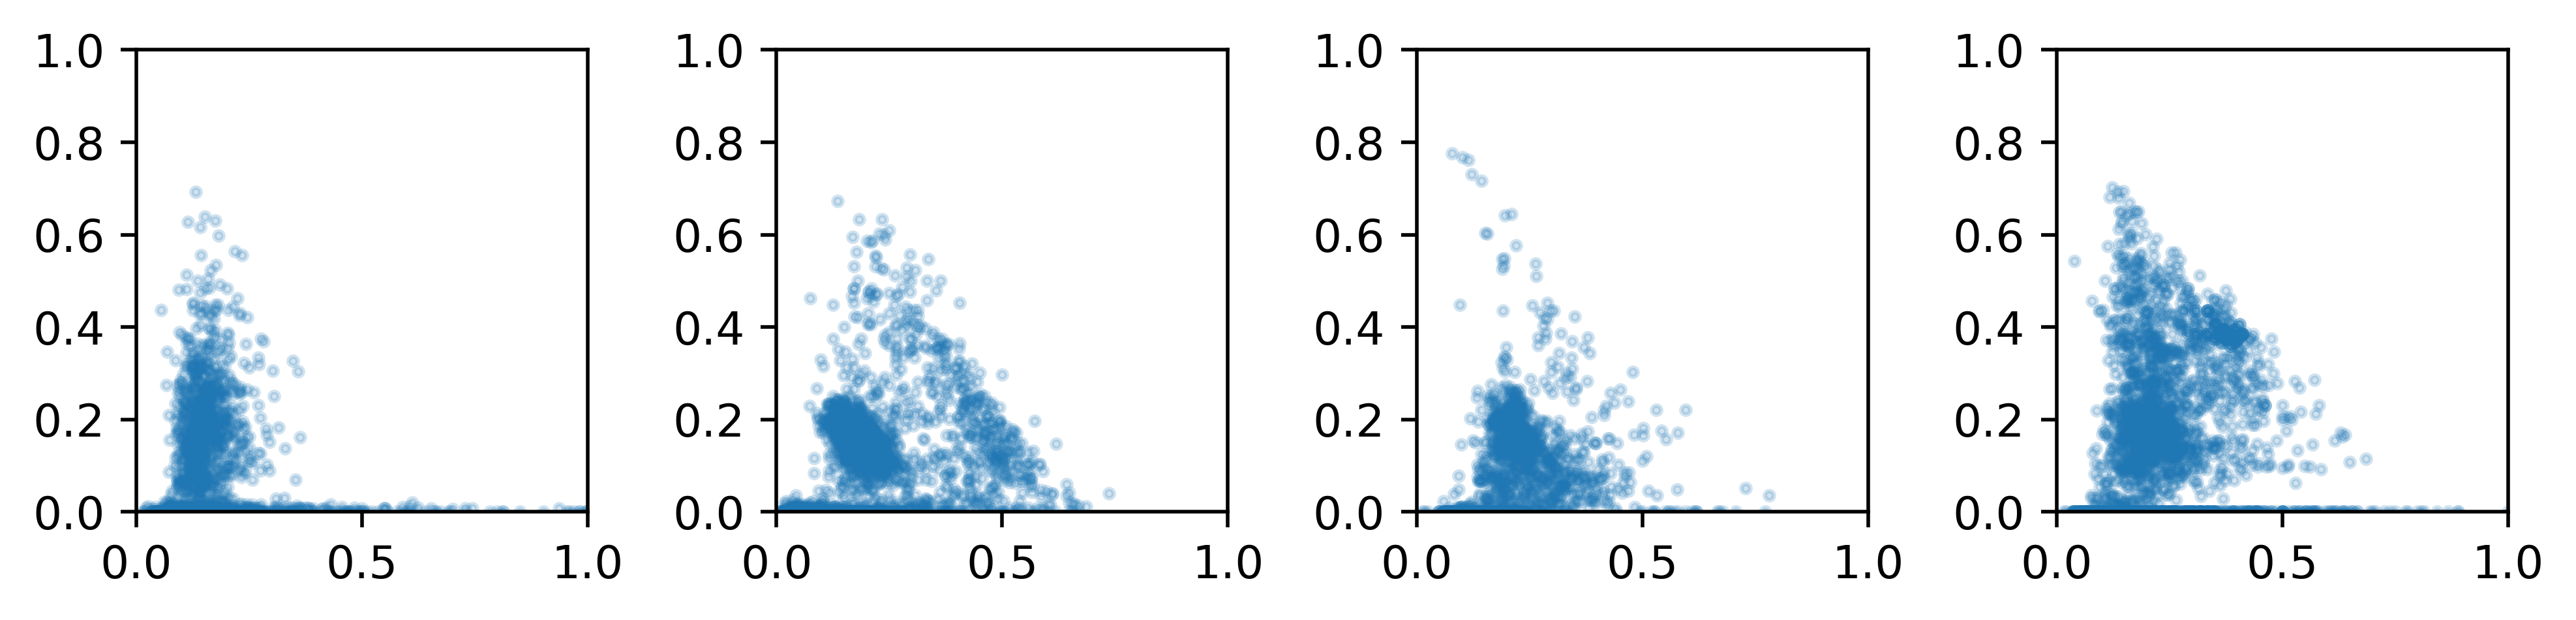

In [33]:
import seaborn as sns

fig,axs = plt.subplots(1,4,figsize=(8,2),dpi=500)

for i, method in enumerate(["ProteinGenerator", "Protpardelle", "PLAID", "Natural"]):
    axs[i].scatter(all_dfs[method]['alpha_fraction'], all_dfs[method]['beta_fraction'], s=4,alpha=0.2)
    axs[i].set_ylim(0,1)
    axs[i].set_xlim(0,1)
    # axs[i].scatter(all_dfs["Natural"]['alpha_fraction'], all_dfs["Natural"]['beta_fraction'], s=3)
    # tmp = pd.concat([all_dfs['Natural'],all_dfs[method]])
    # sns.scatterplot(data=tmp.reset_index(), x="alpha_fraction", y='beta_fraction',hue="method",ax=axs[i])
plt.tight_layout()

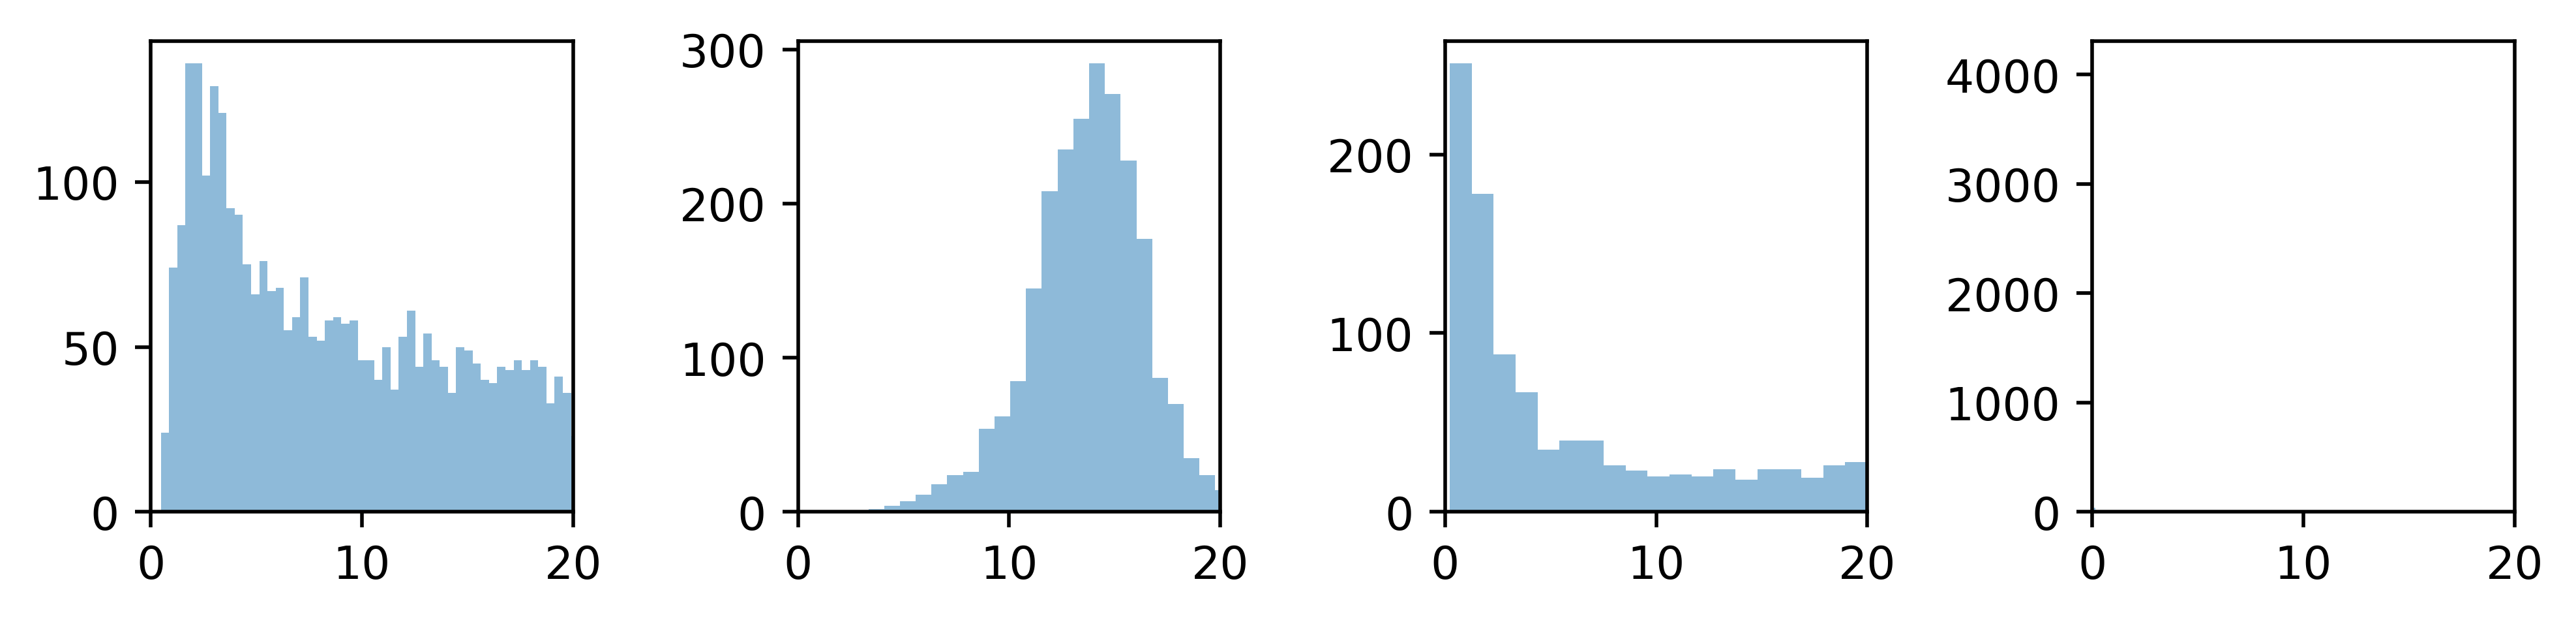

In [65]:
import seaborn as sns

fig,axs = plt.subplots(1,4,figsize=(8,2),dpi=500)

for i, method in enumerate(["ProteinGenerator", "Protpardelle", "PLAID", "Natural"]):
    axs[i].hist(all_dfs[method]['ccrmsd'], bins=100,alpha=0.5)
    axs[i].set_xlim(0,20)
plt.tight_layout()

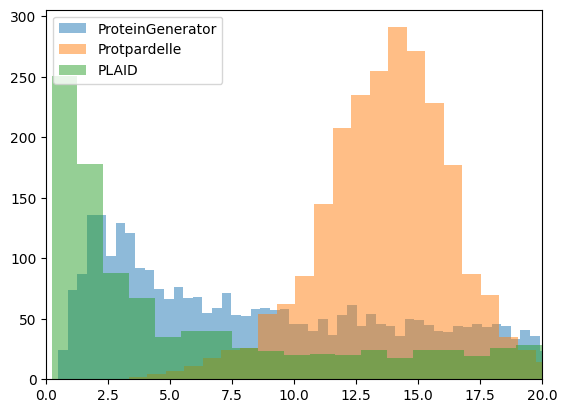

In [50]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['ccrmsd'],bins=100,alpha=0.5,label=method)
    plt.legend()
    plt.xlim(0,20)

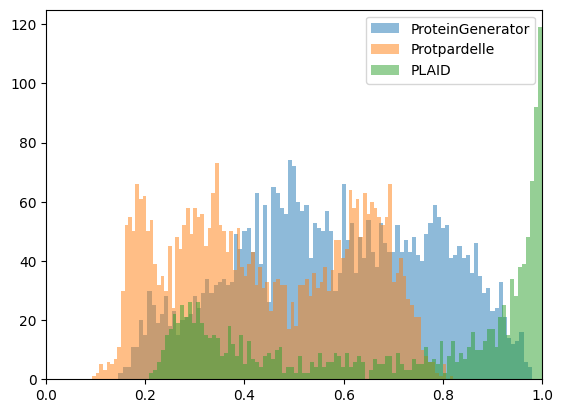

In [52]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['cctm'],bins=100,alpha=0.5,label=method)
    plt.legend()
    plt.xlim(0,1)

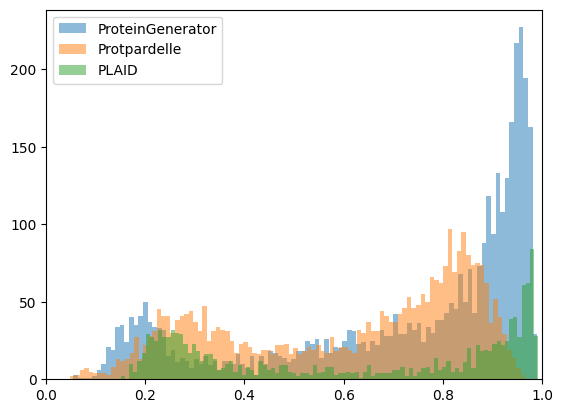

In [53]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['sctm'],bins=100,alpha=0.5,label=method)
    plt.legend()
    plt.xlim(0,1)

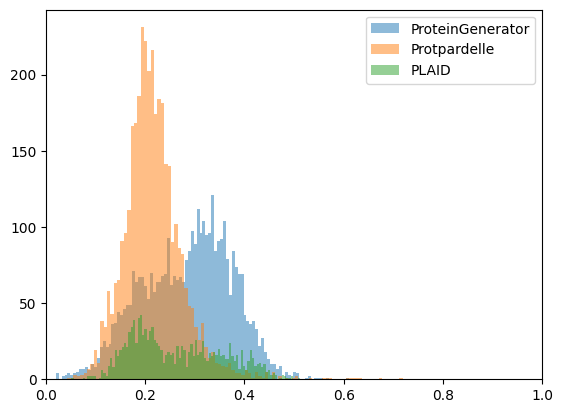

In [54]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['ccsr'],bins=100,alpha=0.5,label=method)
    plt.legend()
    plt.xlim(0,1)

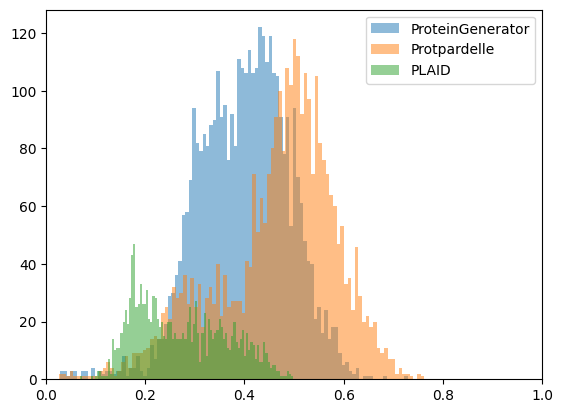

In [55]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['scsr'],bins=100,alpha=0.5,label=method)
    plt.legend()
    plt.xlim(0,1)

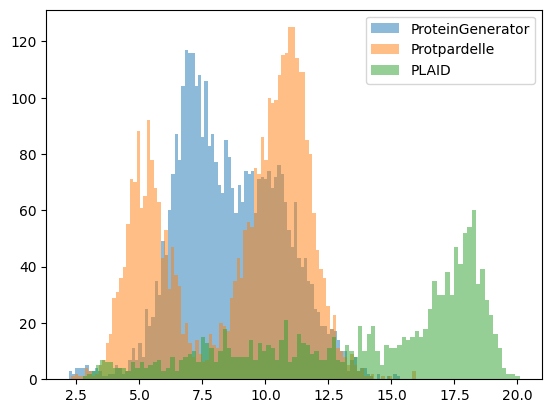

In [69]:
for method in ["ProteinGenerator", "Protpardelle", "PLAID"]:
    _ = plt.hist(all_dfs[method]['perplexity'],bins=100,alpha=0.5,label=method)
    plt.legend()

<Axes: >

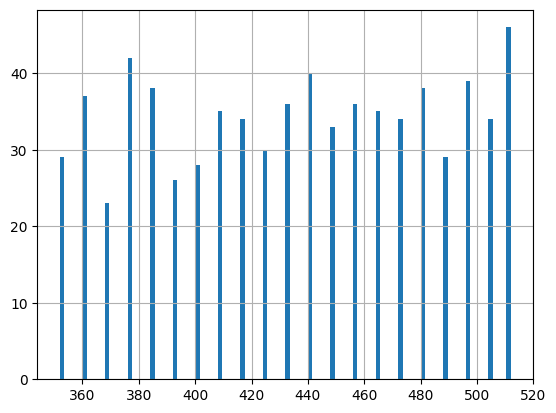

In [76]:
all_dfs['PLAID'][all_dfs['PLAID'].perplexity > 15].sequences.str.len().hist(bins=100)

# Random Pfam partition

In [21]:
df = pd.read_parquet("/data/lux70/data/pfam/val.parquet")

In [22]:
df = df.sample(frac=1.0)[:300]

In [23]:
df.head()

,pfam_id,organism,sequence,GO_id,GO_term,GO_level,GO_counts,GO_idx,organism_index,organism_counts,seq_len
7131444,PF03884,9NEIS,VKCPTCQTPVIWSSESKYRPFCSHRCKLIDLGEWAEERYSVEAVED...,GO:0008270,zinc ion binding,function,101.0,229,28,136316,51
5295153,PF06110,9STRA,TVSDFATLKRMMRLFEDSQPTYLLFISGTWPQNQRMWCIYCRYREA...,,,,NaN,2219,99,249351,97
3518116,PF16898,CERFI,FITPIVKTWQGNNPKRPLRQRSFFTQPEYNEWLEIHKDDKPKWRYK...,,,,NaN,2219,1848,3104,134
8519401,PF00172,PENBI,PGCALCRARRLLCDRRRPSCSQCLRAKRECSGYQDLQAL,GO:0000981,"DNA-binding transcription factor activity, RNA...",function,2.0,76,1630,7660,39
2234502,PF01925,TETTS,KKLLLLIVVFFSVQMLVFIRGGKGLKSFVGITTCSISYWITNAGIL...,GO:0016020,membrane,component,541.0,64,266,20706,203


In [24]:
from plaid.utils import calculate_df_protein_property_mp
df = calculate_df_protein_property_mp(df, sequence_col="sequence")

In [26]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.07112326330581605


{'molecular_weight_wd': 0.015536489068495633,
 'aromaticity_wd': 0.14456048701116148,
 'instability_index_wd': 0.1415111453758757,
 'isoelectric_point_wd': 0.02153643650989587,
 'gravy_wd': 0.08935211430779699,
 'charge_at_pH_wd': 0.014242907561670536}